

# Project: Important  factors in order to predict if a patient will show up for their scheduled appointment?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The selected dataset for this project is the "no-show appointmets" dataset that is originally obtained from <a href="https://www.kaggle.com/joniarroba/noshowappointments"> Kaggle </a>. 
This dataset provide information from 100k medical appointments in Brazil, with the aim of answering the question of whether or not patients show up for their appointment. I have chosen this dataset as I am working in the healthcare field and I am encountering similar problems.

> According to the decription provided as a supplement to  dataset, the number of characteristics about the patient are
included in each row and these are:  
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.  
● ‘Neighborhood’ indicates the location of the hospital.  
● ‘Scholarship’ indicates whether or not the patient is enrolled in a Brasilian welfare program called Bolsa Família.  
● The last column"No-show": it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> According to this describtion, it seems that we will investigate the factors (independant variable) that infulence the last column "No-show" as a dependent variable. This will be accomplished after further exploration and cleaning the data    
>Thus, the questions to be answered in this project are:  
● Does the weekday of the ‘ScheduledDay’ or ‘AppointemntDay’ affect the frequencey of not showing up?   
● Does the patients enrollment in Bolsa Família affect the the frequencey of not showing up?   
● Does the patients' number of handicaps affect the the frequencey of not showing up?  
● Does the age of the patients affect the the frequencey of not showing up?  


# Importing the Libraries to be used in the project




In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> First we will load the data (after uploadig the file to jupyter 

In [303]:
df=pd.read_csv("noshowappointments.csv")

> Then we will have a look to the first couple of rows of the dataset

In [304]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> We will then inspect the properties of each coloumn

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [306]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> We will also make sure that there is only 2 unique values in the "No-show" coloumn as it the one we will predict

In [307]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

> We will also make sure that there is no duplicated values

In [308]:
sum(df.duplicated())

0

>We will also make sure if the multiple records can for the same patients

In [309]:
sum(df["PatientId"].duplicated())

48228

Based on the information and the describtion of the dataset, the following issues have been notices:<ul> 
<li>Surprisengly, it seems that there is no missing data (with 110527 entries and all coloumns had the same number as non-null values, Only 2 values, yes and no, are present in the "No-show" coloumn as expected, and no duplicated records.
<li>However, as expected, both the ScheduledDay and AppointmentDay are provided as objects instead of dates,  
<li>The PatientId and AppointmentID  are provided as float and integers instead of being an object,  
<li>There are some unrealistic ages where the minimum includes a -1 and 0 values 
<li>Same patient can have muliple record.    
</ul>

### Data Cleaning 

#### Converting ScheduledDay and AppointmentDay to dates

In [310]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#### Converting PatientId and AppointmentID to object

In [311]:
df['PatientId']=df['PatientId'].astype('object')
df['AppointmentID']=df['AppointmentID'].astype('object')

#### Inspecting and handling the unrealistic ages

In [312]:
df_wrongage=df.query('Age < 1')
df_wrongage['Age'].value_counts()

 0    3539
-1       1
Name: Age, dtype: int64

> Thus, from the 110527 records, one has been recorded as -1 and 3539 have been recorded as 0. In the analysis that consider age these should be excluded, otherwise the record will be kept. So we gonna create two dataframes one for the analysis of Age, where the records with these false ages are excluded (df_age), and the other for the other analyses, where the Age (df_clean) will be replaced by the median

In [313]:
df_age=df.copy() #to be used for analysis using ages 
df_clean=df.copy() #to be used for analysis not using ages

In [314]:
df_clean["Age"].replace(to_replace = [0,-1], value=df_clean["Age"].median(), inplace= True)

In [315]:
df_age = df_age[df_age["Age"]!= 0]
df_age = df_age[df_age["Age"]!= -1]
#df_age["Age"].replace(to_replace = [0,-1], value=df_clean["Age"].median(), inplace= True)

> Checking it again after correction

In [316]:
sum(df_clean["Age"]<1)

0

In [317]:
sum(df_age["Age"]<1)

0

#### Checking the cleaned dataframes after amendments

In [318]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


In [319]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106987 non-null object
AppointmentID     106987 non-null object
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hipertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handcap           106987 non-null int64
SMS_received      106987 non-null int64
No-show           106987 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does the weekday of the ‘ScheduledDay’ or ‘AppointemntDay’ affect the frequencey of not showing up?

>To adress this question, we need to create a new column for the appointemnt and schedualed day of the week  
Note that as we are not addressing age in this question we will use the df_clean for this question

In [320]:
df_clean["AppointmentWeekDay"]=df_clean["AppointmentDay"].dt.weekday_name

In [321]:
df_clean["ScheduledWeekDay"]=df_clean["ScheduledDay"].dt.weekday_name

>We will draw histogram to visualize the frequencies of both the No and Yes for both the appointment and scheduale day to see if there is a change in patterns. However to minimize the repetation, a function will be defined to allow drawing the histogram based on specific coloumn

In [322]:
def showup_freq(x):
  Show=df_clean["No-show"]
  df_clean[df_clean["No-show"]=="No"][x].hist(alpha=0.6, label='Show')
  df_clean[df_clean["No-show"]=="Yes"][x].hist(alpha=1,label='No-Show')
  plt.suptitle("The frequency of patients showing or not showing to the appointments according to {}".format(x))
  plt.ylabel("Frequency of patients")
  plt.xlabel(x)
  plt.legend()

>Then we will draw histogram to visualize the frequencies of both the No and Yes for both the appointment to see if there is a change in patterns using this function

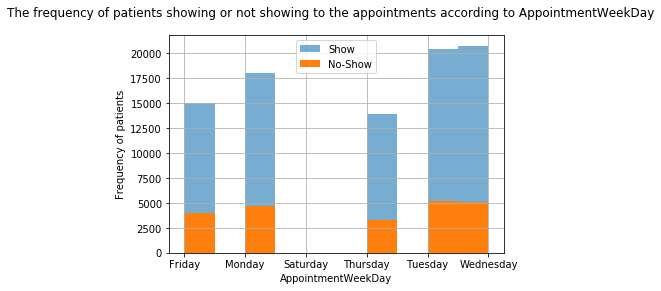

In [323]:
showup_freq("AppointmentWeekDay");

Generally, the number showing up is much more than those not showing up. However, by having a look at the histograms the patterns are not changing, thus, the day of the week of the appointment seems not to affect the rates of showing up to the appointment

>Similarly, we will draw a histogram to visualize the frequencies of both the No and Yes for the schedualing day to see if there is a change in patterns using the same function but with "ScheduledWeekDay" as input 

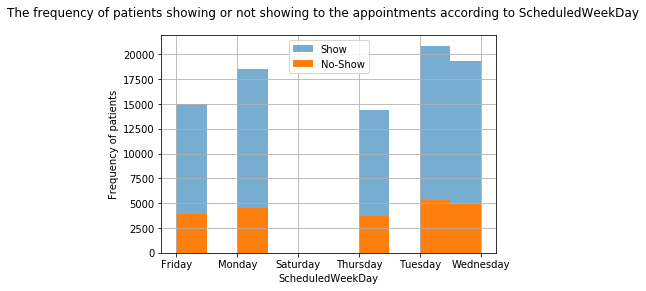

In [324]:
showup_freq("ScheduledWeekDay")

Similar to the appointment day, by having a look at the histograms, the patterns are not changing, thus, the day of the week of schedual week day  seems not to affect the rates of showing up to the appointment

### Research Question 2: Does the patients enrollment in Bolsa Família affect the the frequencey of not showing up?  


>To address this question, we will make use of the "Scholarship" coloum, which is expected to be dichotoums i.e. having two values only either yes or no; thus, we will start by exploring the coloum and ensure that it has only two values.  
Note that as we are not addressing age in this question we will use the df_clean for this question

In [325]:
df_clean["Scholarship"].unique()

array([0, 1])

>Thus we have only two values as expected; But, they not clear, so we will replace 1 by "Yes" and 0 by "No" for visualization purposes

In [326]:
df_clean["Scholarship"].replace(to_replace = [0], value="No", inplace= True)
df_clean["Scholarship"].replace(to_replace = [1], value="Yes", inplace= True)

Thus, we are good to go.  
Then we will draw histogram to visualize the frequencies of both the 0 (no) and 1 (Yes) for both the appointment to see if there is a change in patterns

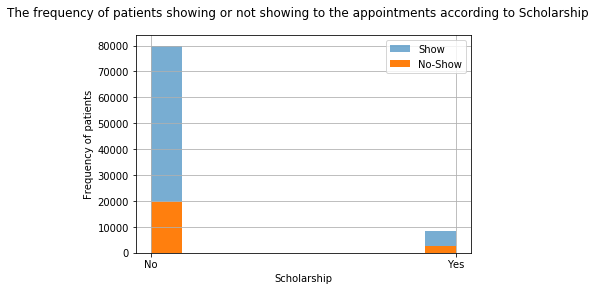

In [327]:
showup_freq("Scholarship");

>By having a look at the histograms the patterns are not changing, thus, having a scholarship seems not to affect the rates of showing up to the appointment.

>But what if we had a better look and it approached more quanitiavily by calclating the porportion of patients not showing up for both the patients with and without the scholarship. To approach this we will convert the No-show variables from a yes/no to 1/0 dummy variables, then calculate and plot the means of these variables for patietns with and without scholarship.  

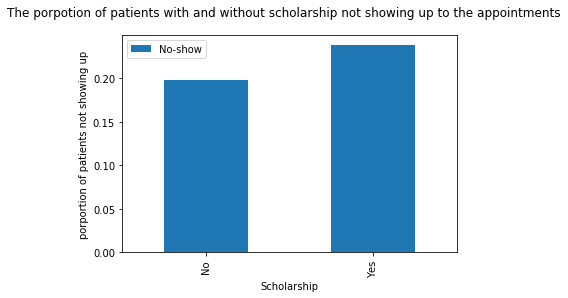

In [328]:
df_clean_dummy=df_clean[["No-show","Scholarship"]].copy()
df_clean_dummy["No-show"].replace(to_replace ="No", value= 0, inplace=True)  # now patients showing up will be 0
df_clean_dummy["No-show"].replace(to_replace ="Yes", value= 1, inplace=True)# now patients not showing up will be 1
df_clean_dummy.groupby("Scholarship").mean().plot(kind="bar") #this is considered the porportion of patients not showing up (mean calculated as sum of variables"i.e 1 for patients not showing up an 0 for patients showing up"/ their total number)
plt.suptitle("The porpotion of patients with and without scholarship not showing up to the appointments")
plt.ylabel("porportion of patients not showing up"); 

In [329]:
df_clean_dummy.groupby("Scholarship").mean()

,No-show
Scholarship,
No,0.198072
Yes,0.237363


From this bar chart it seems that having a scholarship is slightly associated with higher rate of not showing up to the appointment, but the difference need further statistical analysis to confirm its significance 

### Research Question 3: Does the age of the patients affect the the frequencey of not showing up?   


>To address this question, we will make use of the "Age" coloum, which is expected to be continous ; thus, for this dicotomus outcome, a box plot would seems to be better solution.  
Note that as we are addressing age in this question, we will use the df_age for this question

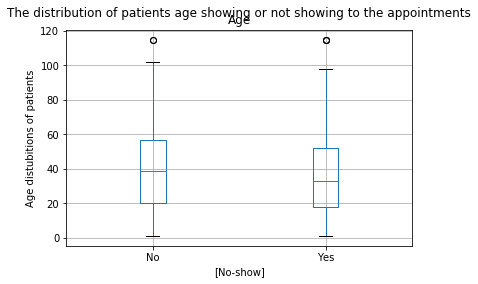

In [330]:
df_age[["Age", "No-show"]].boxplot(by="No-show")
plt.suptitle("The distribution of patients age showing or not showing to the appointments")
plt.ylabel("Age distubitions of patients");

In [331]:
df_age[df_age["No-show"]=="Yes"]["Age"].median()

33.0

In [332]:
df_age[df_age["No-show"]=="No"]["Age"].median()

39.0

By haveing a look at the box plot, it seems that those not showing at their appointment generally have a slightly lower age, with a median of around 33 not showing up, while those showing up are with a median of around 39 

### Research Question 4: Does the patients' number of handicaps affect the the frequencey of not showing up?  

> To address this question, we will make use of the "Handcap" coloum, which has four values, from 0 to 4, thus, we will explore potantial influece using a bar chart.
Note that as we are not addressing age in this question, we will use the df_clean for this question

In [333]:
df_clean["No-show"].replace(to_replace = ["Yes"], value=0, inplace= True)
df_clean["No-show"].replace(to_replace = ["No"], value=1, inplace= True)

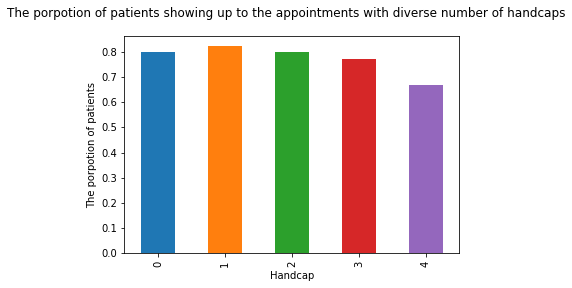

In [334]:
df_clean.groupby("Handcap")["No-show"].mean().plot(kind='bar')
plt.suptitle("The porpotion of patients showing up to the appointments with diverse number of handcaps")
plt.ylabel("The porpotion of patients");

From this bar chart, it seems that for patients with handicaps, the increase of number of handicaps is associated with a decrease in the frequency of showing up at the appointment (no show up increase). However, based on this data, not having any handicap seems to be associated with a higher no-show up rate than having at least a single handicap.

<a id='conclusions'></a>
## Conclusions

> After Exploring five variables (Age, scholarship, Appointment weekday and Schedual week day, and number of handicaps), Age, having a scholarship, and the number of handicaps have shown to have a potential influence on the rates of showing-up to the appointment. Where it seems that those not showing at their appointment had a slightly lower median age. Similarly, for patients with handicaps, the increase of number of handicaps is associated with a decrease in the frequency of showing up at the appointment (no show up increase). Finally, having a scholarship is slightly associated with higher rate of not showing up to the appointment. However,  further statistical analysis is needed to confirm the statistical significance of the difference shown among the 2 groups.

### Limitations
>● There are many other varibales that could be examined, however, we only chose those variables for time and feasiblity sake, but those other variables may show significant influence.  
● There are concerns about data validity, since when we explored the data it seemed like many points are invalid such as the age which shown to be 0 or of negative values; although we corrected it for the analysis of the age, they could reflect bad data collection.  
● Large number of records have been excluded in the dataset used for the analysis of the impact of Age due to invalid data, which could compromise the analysis validity.  
● Same patient can have muliple record and this could compromise the analysis validity, where the patterns could be associated with patients not their charactersitics.  



In [335]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0